# Linear Maximal Margin Classifier on MNIST dataset

## 1. Import Modules, Define Constants and Initialize Notebook
<a id="1"></a>

In [1]:
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Constants:
RANDOM_SEED = 7
VAL_RATIO = 0.2

%matplotlib inline
np.random.seed(RANDOM_SEED)

## 2. Import and Clean Data
<a id="2"></a>

In [3]:
# Read the file:
trainFile = "./train.csv"
trainData = pd.read_csv(trainFile, na_values=[" "])

testFile = "./mnist_test.csv"
testData = pd.read_csv(testFile, na_values=[" "])

In [4]:
# Looking into dataset:
print("Training Data\n")
trainData.info()
display(trainData.head())

print("\nTesting Data\n")
testData.info()
display(testData.head())

Training Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Testing Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 785 entries, 7 to 0.667
dtypes: int64(785)
memory usage: 59.9 MB


,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
testData.columns = trainData.columns

testData.info()
display(testData.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 59.9 MB


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3. Exploratory Data Analysis
<a id="3"></a>

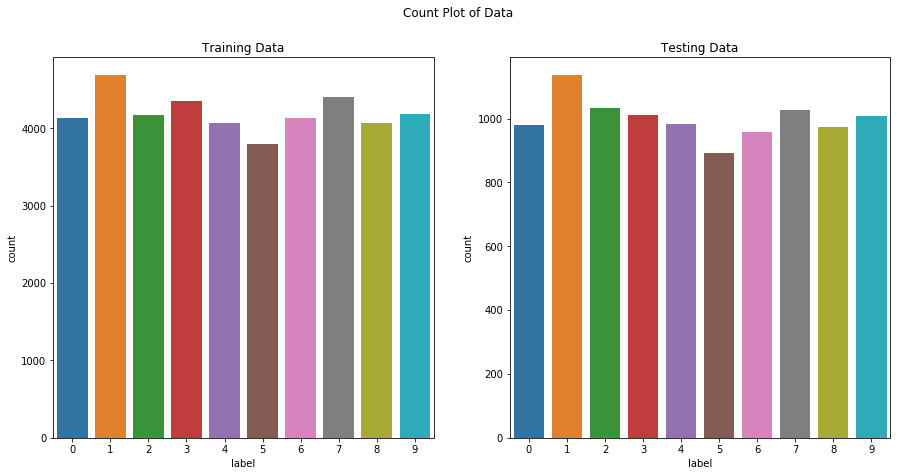

In [6]:
#Count Plot:-
fig, ax = plt.subplots(1, 2, figsize=(15, 7));
plt.suptitle("Count Plot of Data")
sns.countplot(x=trainData.label, ax=ax[0]); ax[0].set_title("Training Data");
sns.countplot(x=testData.label, ax=ax[1]); ax[1].set_title("Testing Data");

## 4. Machine Learning
<a id="4"></a>

### 4.1 Preprocessing Data
<a id="4.1"></a>

In [7]:
xTrain = StandardScaler().fit_transform(trainData.drop(['label'], axis=1).values)
yTrain = trainData['label'].values

xTest = StandardScaler().fit_transform(testData.drop(['label'], axis=1).values)
yTest = testData['label'].values

### 4.2 Divide Dataset into Training and Validation Data using Holdout Method with Random Sampling
<a id="4.2"></a>

In [8]:
X_trainHold, X_valHold, Y_trainHold, Y_valHold = train_test_split(xTrain, yTrain, test_size=VAL_RATIO,
                                                                    random_state=RANDOM_SEED)

### 4.3 Training Model and Testing on Validation Data
<a id="4.3"></a>

In [9]:
# modelName, model = "Linear SVC", SGDClassifier(loss='hinge', penalty='elasticnet', alpha=1e-9, l1_ratio=1,
#                                                max_iter=1000, tol=1e-4, verbose=0, n_jobs=-1,
#                                                random_state=RANDOM_SEED, learning_rate='invscaling',
#                                                eta0=1e-2, power_t=0.5)
# modelName, model = "Linear SVC", LinearSVC(penalty='l2', loss='hinge', dual=True, tol=1e-3, C=1.0,
#                                            verbose=1, random_state=RANDOM_SEED, max_iter=100000)
modelName, model = "Linear Maximal Margin Classifier", SVC(C=1.0, kernel='linear', tol=1e-3, cache_size=600,
                                                           verbose=True, max_iter=-1, random_state=RANDOM_SEED)

print("\nAccuracy on validation data:", model.fit(X_trainHold, Y_trainHold).score(X_valHold, Y_valHold))

[LibSVM]
Accuracy on validation data: 0.9182142857142858


## 5. Evaluation and Inference
<a id="5"></a>

### 5.1 Performance of Linear Maximal Margin Classifier on Test Data
<a id="5.1"></a>

[LibSVM]Performance on Test Data for Linear Maximal Margin Classifier :-

Accuracy of Linear Maximal Margin Classifier on Test Data: 0.9658965896589659


Classification Report:-
              precision    recall  f1-score   support

          0       0.98      0.99      0.98       980
          1       0.98      1.00      0.99      1135
          2       0.95      0.98      0.96      1032
          3       0.94      0.95      0.95      1010
          4       0.96      0.97      0.97       982
          5       0.94      0.95      0.94       892
          6       0.99      0.97      0.98       958
          7       0.97      0.96      0.96      1027
          8       0.97      0.94      0.96       974
          9       0.97      0.95      0.96      1009

avg / total       0.97      0.97      0.97      9999



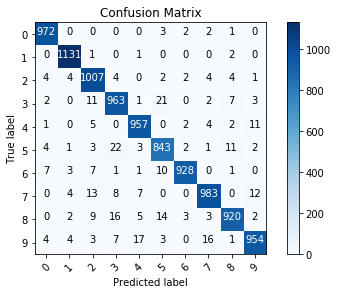

In [10]:
model.fit(xTrain, yTrain)

print("Performance on Test Data for", modelName, ":-\n")
predictions = model.predict(xTest)

print("Accuracy of {} on Test Data: {}\n".format(modelName, accuracy_score(yTest, predictions)))

print("\nClassification Report:-\n", classification_report(yTest, predictions))

# Confusion Matrix Plot:-
cm = confusion_matrix(yTest, predictions)
plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, np.arange(10), rotation=45)
plt.yticks(tick_marks, np.arange(10))
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### 5.2 Weights Learnt by Linear Maximal Margin Classifier
<a id="5.2"></a>

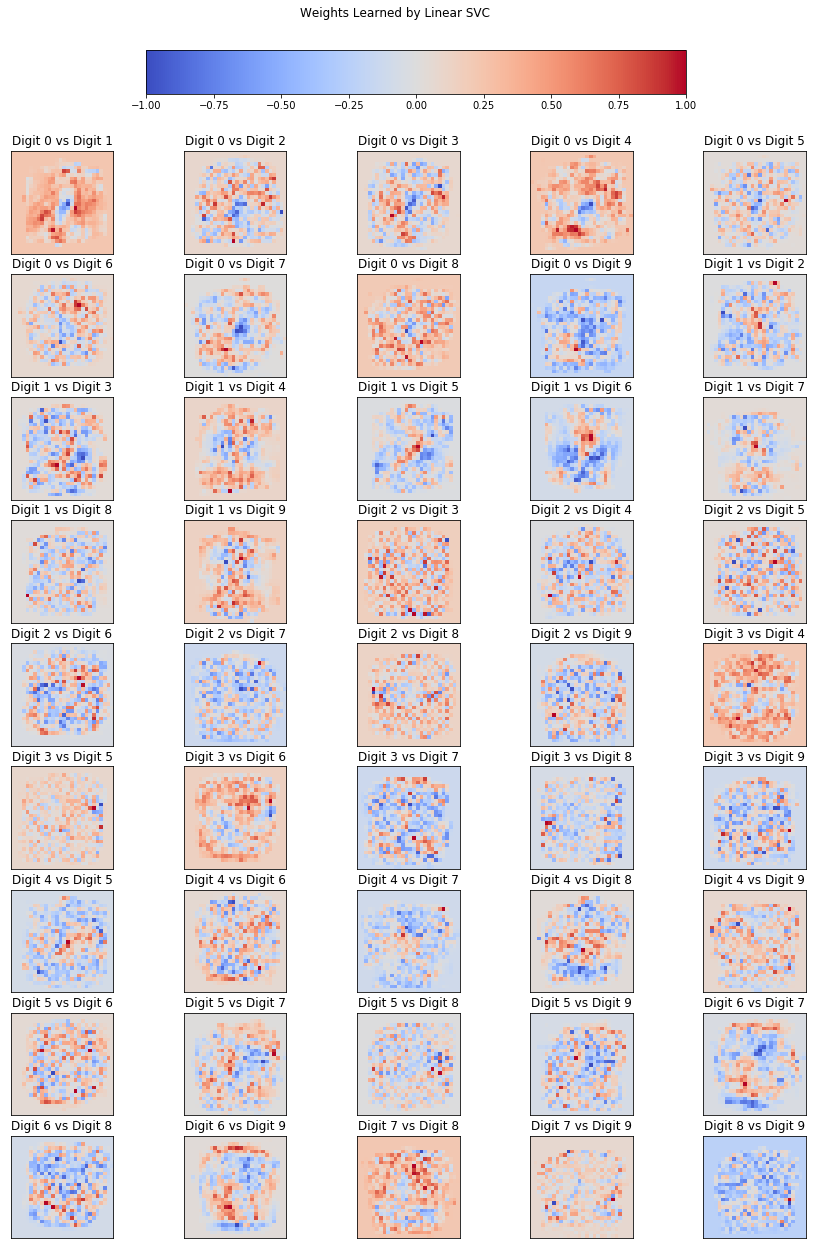

In [11]:
Weights = model.coef_ # + model.intercept_[:, np.newaxis]

fig, axes = plt.subplots(9, 5, figsize=(15, 20))
plt.suptitle("Weights Learned by Linear SVC")
cax = fig.add_axes([0.27, 0.92, 0.5, 0.03])

i, j = 0, 1
for weight, ax in zip(Weights, axes.ravel()):
    weight = np.interp(weight, [np.min(weight), np.max(weight)], [-1, 1])
    im = ax.imshow(weight.reshape(28, 28), interpolation='nearest', cmap=plt.get_cmap('coolwarm'))
    ax.set_title("Digit {} vs Digit {}".format(i, j))
    ax.set_xticks(())
    ax.set_yticks(())
    j += 1
    if j>9:
        i += 1
        j = i+1

fig.colorbar(im, cax=cax, orientation='horizontal')
plt.savefig('waights.png', bbox_inches='tight')
plt.show()

### 5.3 Margin Calculation
<a id="5.3"></a>

In [12]:
Margin = 2/np.linalg.norm(Weights, axis=1)

## 6 Dumping Data
<a id="6"></a>

In [13]:
np.savetxt("margin.txt", Margin, delimiter=',', header="Margins")
np.savetxt("weights.txt", Weights, delimiter=',', header="Waight Matrix")